In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import csv

hist = []
files = ['../excel/dados_historicos_alunos_de_EngComputacaoCuritiba formados.csv',
         '../excel/dados_historicos_alunos_de_EngComputacaoCuritiba regulares.csv',
         #'../excel/dados_historicos_alunos_de_EngComputacaoCuritiba trancados.csv',
         #'../excel/dados_historicos_alunos_de_EngComputacaoCuritiba desistentes mudancas curso.csv'
         ]

# preenche as listas iniciais
for file in files:
    print(file)
    with open(file, 'r') as csvfile:   
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:
            hist.append(row)
print(len(hist))
print(hist[0])

../excel/dados_historicos_alunos_de_EngComputacaoCuritiba formados.csv
../excel/dados_historicos_alunos_de_EngComputacaoCuritiba regulares.csv
50026
{'ID_ANONIMO': '13236', 'CR': '0,6826', 'PERIODO': '1', 'INGRESSO': '12/07/07', 'CODIGO': 'IF68E', 'ANO': '2012', 'NOTA': '8,2', 'CH': '60', 'SITUACAOALUNO': 'Formado'}


In [23]:
# função para verificar se um aluno teve seu ingresso antes ou depois de 2014
def beforeClasses(date):
    year = date.split('/')[2]
    if (int(year) < 14):
        return True
    return False

In [24]:
# Remove todos os alunos que ingressaram antes de 2014 
for i in range(len(hist)):
    if (i == len(hist)):
        break
    if (beforeClasses(hist[i]['INGRESSO'].split(" ")[0])):
        hist.pop(i)
        i = 0

# Remove todos dados de reprovações (matérias repetidas)
for i in range(len(hist)):
    for j in range(i, len(hist)):
        if (j == len(hist)):
            break
        if (hist[i]["ID_ANONIMO"] != hist[j]["ID_ANONIMO"]):
            break
        if (j < len(hist) and (i != j and (hist[i]["ID_ANONIMO"] == hist[j]["ID_ANONIMO"] and hist[i]["CODIGO"] == hist[j]["CODIGO"]))):
            hist.pop(j)
            j -= 5
len(hist)

# TODO: caso o aluno tenha reprovado em uma matéria, deve ser removido também. 
# Uma reprovação não conta para o sistema de recomendação

33816

In [25]:
G = nx.Graph()

# Adiciona todos os nós, que são os alunos
# Sem colocar nenhum aluno pré-2014
for line in hist:
    if (not beforeClasses(line['INGRESSO'].split(" ")[0])):
        if not G.has_node(line["ID_ANONIMO"]):
            G.add_node(line["ID_ANONIMO"])
G.nodes()

NodeView(('90729', '113853', '118844', '123664', '123676', '123677', '123686', '123688', '123736', '129034', '131006', '131014', '136341', '136730', '136731', '136736', '145077', '150873', '150878', '150887', '150892', '151217', '156158', '158257', '159067', '160836', '160839', '160852', '160855', '161216', '161223', '161226', '161228', '165431', '165432', '165685', '165892', '165894', '165895', '166050', '169043', '171740', '171745', '171746', '171749', '171750', '171751', '171754', '171755', '172044', '172045', '172046', '172207', '172208', '172248', '172307', '172974', '175962', '179385', '179393', '179397', '179408', '179624', '179652', '179819', '179822', '179823', '179944', '180984', '182856', '182913', '183413', '183414', '186021', '186024', '186036', '189048', '190493', '190494', '190495', '190499', '190508', '190615', '191284', '198372', '198543', '202261', '11357', '104342', '104372', '104768', '110307', '113861', '118817', '123657', '123682', '124800', '126813', '130359', '1

In [26]:
print(G.number_of_nodes())

484


In [27]:
# Verifica quais são as matérias obrigatórias, que não serão levadas em conta
optional = []
with open('../texts/optativas.txt', 'r') as f:   
    lines = f.readlines()
    for l in lines:
        optional.append(l.split(" ")[0])

print(optional)

['CSH30', 'CSV30', 'CSH42', 'CSI53', 'CSV40', 'CSR44', 'CSR41', 'CSR42', 'MA70C', 'CSB51', 'ED70T', 'CSB41', 'CSI41', 'DI84D', 'CSV45', 'CSR43', 'CSM44', 'CSM41', 'CSM43', 'ES70J', 'ES70B', 'CSM40', 'CSB53', 'ES70N', 'GE70F', 'CSA44', 'CSB54', 'CSH44', 'EEY41', 'ED70U', 'CSH43', 'CSE40', 'CSM30', 'CSI56', 'CSA45', 'FI70B', 'FI70D', 'CSA42', 'EL64B', 'CSV52', 'CSB52', 'CSD41', 'FI70A', 'CSD40', 'CSR53', 'CSG42', 'CSI58', 'CSI57', 'CSG48', 'CSV41', 'CSI51', 'CSW45', 'CSE43', 'CSI55', 'FCH7HB', 'CSR47', 'EEY44', 'CSH45', 'CSA41', 'EEC41', 'EL6CB', 'EEY43', 'CSR48', 'EEY42', 'EL6AE', 'CSH41', 'CSD52', 'EEY51', 'EEL51', 'CSI54', 'CSA43', 'CSW47', 'CSI31', 'IF6BV', 'CSR45', 'CSG44', 'FI70E', 'EL75H']


In [28]:
# Adiciona as arestas
with open('all_edges.txt', 'w') as f:
    for i in range(len(hist)):
        # o estudante deve estar no grafo
        if G.has_node(hist[i]["ID_ANONIMO"]):
            # a disciplina não pode ser obrigatória
            if (hist[i]["CODIGO"] in optional):
                for j in range(i, len(hist)):
                    # o estudante deve estar no grafo
                    if G.has_node(hist[j]["ID_ANONIMO"]):
                        # a disciplina não pode ser obrigatória
                        if (hist[j]["CODIGO"] in optional):
                            # os alunos deve ser diferentes
                            if (hist[i]["ID_ANONIMO"] != hist[j]["ID_ANONIMO"]):
                                # as disciplinas que eram obrigatorias antes de 2017 n contam
                                if (line['CODIGO'] != 'ES70N' or int(line['ANO']) > 2017):
                                    if (line['CODIGO'] != 'FI70D' or int(line['ANO']) > 2017):
                                       if (line['CODIGO'] != 'FI70A' or int(line['ANO']) > 2017) and \
                                           (line['CODIGO'] != 'GE70F' or int(line['ANO']) > 2017):
                                            # as matérias devem ser as mesmas
                                            if (hist[i]["CODIGO"] == hist[j]["CODIGO"]):
                                                f.write(hist[i]["ID_ANONIMO"] + " - " + hist[j]["ID_ANONIMO"] + " : " + hist[j]["CODIGO"] + "\n")
                                                if (G.has_edge(hist[i]["ID_ANONIMO"], hist[j]["ID_ANONIMO"])):
                                                    G[hist[i]["ID_ANONIMO"]][hist[j]["ID_ANONIMO"]]['weight'] += 1
                                                else:
                                                    G.add_edge(hist[i]["ID_ANONIMO"], hist[j]["ID_ANONIMO"], weight = 1) 

In [29]:
# Remover as arestas com peso pequeno
edges_remove = []
for u, v, a in G.edges(data=True):
    if a["weight"] < 0:
        edges_remove.append([u, v])
G.remove_edges_from(edges_remove)

In [30]:
print(G.number_of_edges())

8788


In [31]:
# ordena os vértices por grau, para verificar os alunos com maior n de matérias em comum
degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)
remove = [node for node, degree in dict(G.degree()).items() if degree == 0]
G.remove_nodes_from(remove)
G.number_of_nodes()

180

In [32]:
with open('node_degree_all.txt', 'w') as f:
    for degree in degrees:
        f.write(str(degree) + "\n")

In [33]:
# Escreve o arquivo gexf para visualização de grafos
nx.write_gexf(G, "grafo_caminho.gexf")

In [34]:
# ordena as arestas por peso, buscando assim quais os estudantes mais relacionadas
edges = sorted(G.edges(data=True), key=lambda edge: edge[2].get('weight', 1))
with open('edge_weights.txt', 'w') as f1:
    for edge in edges:
        f1.write(str(edge) + "\n")


In [35]:
import leidenalg as la
import igraph as ig
# Separa o grafo em comunidades
# O alg usado para isso é o Leinden, com a biblioteca LeidenAlg
# para isso, é preciso transformar o grafo do networkX para Igraph
H = ig.Graph.from_networkx(G)
H.is_weighted()

True

In [36]:
ws = []
for e in H.es():
  ws.append(e['weight'])

In [37]:
ig.plot(H)

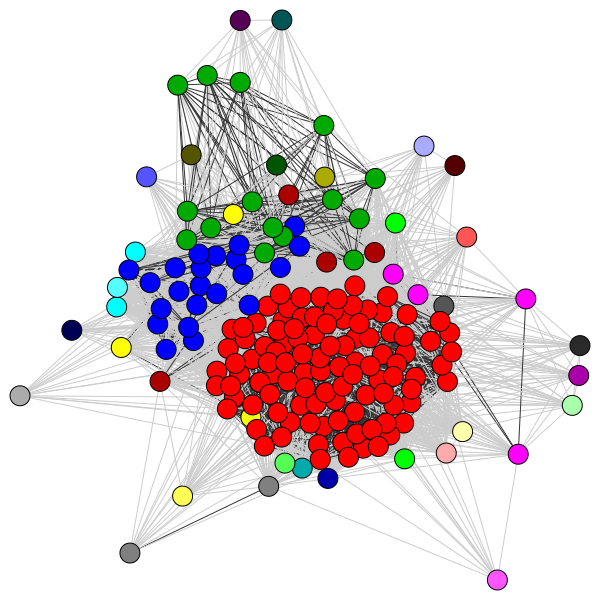

In [43]:
# Agora roda a partição
# Todos os algoritmos utilizados possuem a opção de utilizar arestas com ou sem peso
#   no nosso caso, sempre serão usadas arestas com peso

# Algoritmo de Leiden 
#partition = la.find_partition(H, la.ModularityVertexPartition, weights=H.es()[:]["weight"], n_iterations=50)

# Algoritmo de Infomap Martin Rosvall e Carl T. Bergstrom
# Este algoritmo também aceita vértices com peso, talvez possa ser interessante utilizando algum atributo para os alunos
# Não devide em nenhuma comunidade :(
#partition = H.community_infomap(edge_weights='weight')

# Algoritmo de propagação de labels (??) de Raghavan
# Não divide em nenhuma comunidade
#partition = H.community_label_propagation(weights='weight')

# Algoritmo de Newman
# Em média, divide em 2 comunidades.
# Engraçado que sem colocar pesos ele separa em 3
#partition = H.community_leading_eigenvector(weights='weight')

# Algoritmo de Leiden implementado no Igraph
# Separou em muitas comunidades wtf
# Verificar depois 
partition = H.community_leiden(weights='weight')

# Algoritmo de multilevel de Blondel
# separa de 3 a 4 comunidades
#partition = H.community_multilevel(weights='weight')

ig.plot(partition)



In [45]:
comunidades = []
for com in enumerate(partition.membership):
    if (len(comunidades) <= com[1]):
        comunidades.append([])
    comunidades[com[1]].append(H.vs()[com[0]]["_nx_name"])

import pandas as pd
dados = []
for file in files:
    with open(file, 'r') as csvfile:   
        dados.append(pd.read_csv(csvfile, delimiter=';'))

dados = pd.concat(dados)

dados_filtrados = dados[dados.CODIGO.apply(lambda a: a in optional)]
dados_filtrados = dados_filtrados[[int(x[3].split('/')[2].split(' ')[0]) >= 14 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[float(str(x[7]).replace(',','.')) >= 6 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[x[4] != 'ES70N' or x[5] > 2017 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[x[4] != 'FI70D' or x[5] > 2017 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[x[4] != 'FI70A' or x[5] > 2017 for x in dados_filtrados.values]]
dados_filtrados = dados_filtrados[[x[4] != 'GE70F' or x[5] > 2017 for x in dados_filtrados.values]]
#dados_filtrados

from collections import Counter

disciplinas_comunidades = []

# Pega as disciplinas de cada comunidade
for idx, comunidade in enumerate(comunidades):
    disciplinas_comunidades.append(pd.DataFrame())
    for id in comunidade:
        disciplinas_comunidades[idx] = pd.concat([disciplinas_comunidades[idx],
                   dados_filtrados[dados_filtrados.ID_ANONIMO.apply(lambda a: a == int(id))]
                  ])
        pass

# Pega as disciplinas mais populares em cada comunidade
for idx, comunidade in enumerate(disciplinas_comunidades):
    print("Comunidade " + str(idx) + ": " + str(Counter(comunidade.CODIGO).most_common(5)))

Comunidade 0: [('CSH30', 89), ('CSH42', 41), ('CSV30', 30), ('MA70C', 22), ('CSR43', 15)]
Comunidade 1: [('CSR45', 1), ('CSD40', 1), ('ES70J', 1), ('ES70B', 1)]
Comunidade 2: [('CSV30', 21), ('CSV40', 12), ('CSI53', 7), ('ED70T', 5), ('CSB51', 5)]
Comunidade 3: [('CSI53', 3), ('CSB41', 2), ('CSB54', 2), ('CSI58', 1), ('EEY51', 1)]
Comunidade 4: [('CSM41', 2), ('CSR41', 1), ('CSR44', 1), ('CSM43', 1), ('MA70C', 1)]
Comunidade 5: [('CSV30', 2), ('CSI55', 1), ('CSE43', 1), ('CSW45', 1), ('CSI51', 1)]
Comunidade 6: [('CSM44', 2), ('DI84D', 2), ('ES70B', 1), ('FCH7HB', 1), ('CSR47', 1)]
Comunidade 7: [('CSB53', 3), ('CSM40', 3), ('CSB51', 2), ('CSR43', 2), ('DI84D', 1)]
Comunidade 8: [('CSA41', 15), ('CSV30', 6), ('CSA45', 5), ('MA70C', 5), ('CSB53', 4)]
Comunidade 9: [('CSR42', 1), ('CSA44', 1)]
Comunidade 10: [('ED70T', 1), ('CSM40', 1)]
Comunidade 11: []
Comunidade 12: [('CSH30', 1)]
Comunidade 13: [('CSM40', 1)]
Comunidade 14: [('CSG42', 1), ('CSE40', 1), ('CSM43', 1)]
Comunidade 15: [(